In [1]:
import pandas as pd

test_data = pd.read_csv(
    "../files/input/test_data.csv.zip",
    index_col=False,
    compression="zip",
)

train_data = pd.read_csv(
    "../files/input/train_data.csv.zip",
    index_col=False,
    compression="zip",
)

In [2]:
# - Renombre la columna "default payment next month" a "default".
test_data = test_data.rename(columns={'default payment next month': 'default'})
train_data = train_data.rename(columns={'default payment next month': 'default'})

print(test_data.columns)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')


In [3]:
# - Remueva la columna "ID".
test_data=test_data.drop(columns=['ID'])
train_data=train_data.drop(columns=['ID'])


In [4]:
# Eliminar registros con valores faltantes
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

In [5]:
# - Elimine los registros con informacion no disponible.

import numpy as np

# Para train_data
train_data = train_data.loc[train_data["MARRIAGE"] != 0]
train_data = train_data.loc[train_data["EDUCATION"] != 0]
print(train_data["EDUCATION"].value_counts())
print(train_data["MARRIAGE"].value_counts())

# Para test_data (corregido)
test_data = test_data.loc[test_data["MARRIAGE"] != 0]
test_data = test_data.loc[test_data["EDUCATION"] != 0]
print(test_data["EDUCATION"].value_counts())
print(test_data["MARRIAGE"].value_counts())


EDUCATION
2    9756
1    7476
3    3396
5     187
4      98
6      40
Name: count, dtype: int64
MARRIAGE
2    11226
1     9502
3      225
Name: count, dtype: int64
EDUCATION
2    4268
1    3105
3    1477
5      93
4      25
6      11
Name: count, dtype: int64
MARRIAGE
2    4728
1    4153
3      98
Name: count, dtype: int64


In [6]:
# - Para la columna EDUCATION, valores > 4 indican niveles superiores
test_data['EDUCATION'] = test_data['EDUCATION'].apply(lambda x: 4 if x > 4 else x)
train_data['EDUCATION'] = train_data['EDUCATION'].apply(lambda x: 4 if x > 4 else x)

print(train_data["EDUCATION"].value_counts())
print(test_data["EDUCATION"].value_counts())

EDUCATION
2    9756
1    7476
3    3396
4     325
Name: count, dtype: int64
EDUCATION
2    4268
1    3105
3    1477
4     129
Name: count, dtype: int64


In [7]:
# Divida los datasets en x_train, y_train, x_test, y_test.
x_train=train_data.drop(columns="default")
y_train=train_data["default"]


x_test=test_data.drop(columns="default")
y_test=test_data["default"]

In [8]:
x_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,310000,1,3,1,32,0,0,0,0,0,...,110375,84373,57779,14163,8295,6000,4000,3000,1000,2000
1,10000,2,3,1,49,-1,-1,-2,-1,2,...,-748,1690,1138,930,0,0,2828,0,182,0
2,50000,1,2,1,28,-1,-1,-1,0,-1,...,46257,45975,1300,43987,0,46257,2200,1300,43987,1386
3,80000,2,3,1,52,2,2,3,3,3,...,40101,40748,39816,40607,3700,1600,1600,0,1600,1600
4,270000,1,1,2,34,1,2,0,0,2,...,20924,22448,15490,17343,0,4000,2000,0,2000,2000


In [9]:
!pip install seaborn 

DEPRECATION: Loading egg at c:\users\user\documents\2024-2-lab-03-prediccion-del-default-usando-svc-lgallego06\.venv\lib\site-packages\homework-0.1-py3.13.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\user\documents\2024-2-lab-03-prediccion-del-default-usando-svc-lgallego06\.venv\lib\site-packages\joblib-1.4.2-py3.13.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\user\documents\2024-2-lab-03-prediccion-del-default-usando-svc-lgallego06\.venv\lib\site-packages\numpy-2.2.1-py3.13-win-amd64.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussio

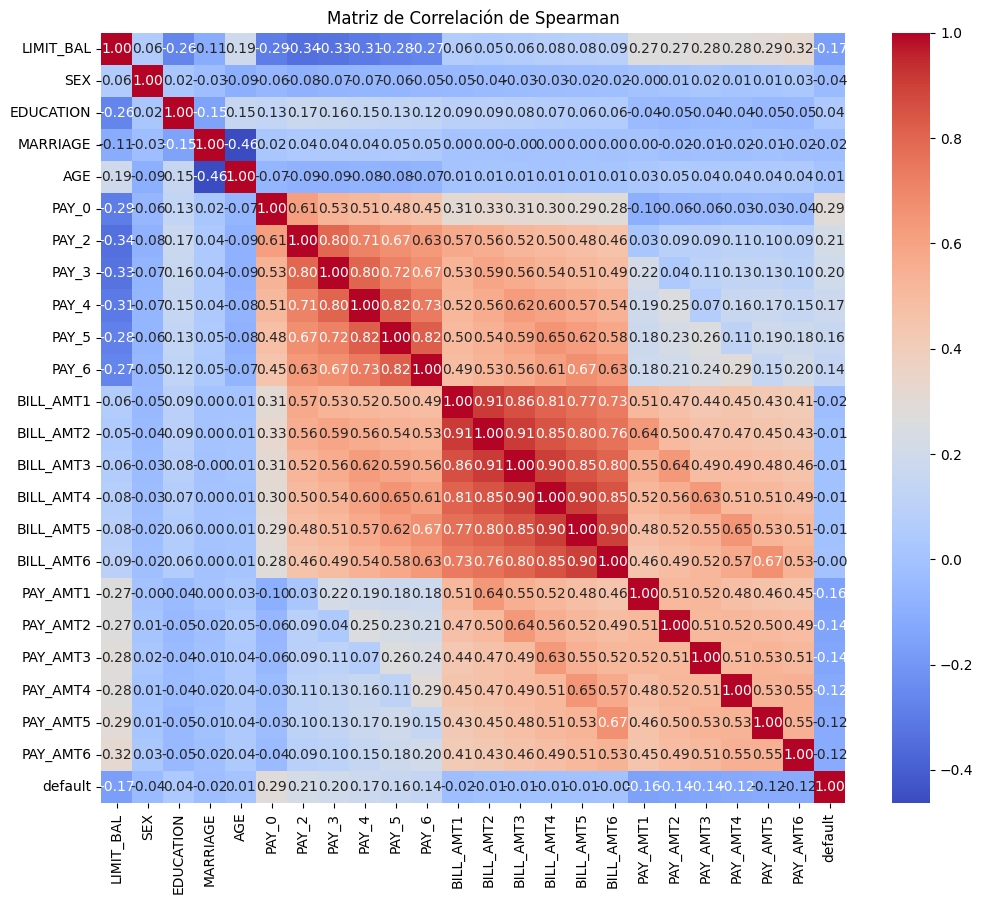

In [10]:
import seaborn as sns

import matplotlib.pyplot as plt

# Calcular la matriz de correlación de Spearman
corr_matrix = train_data.corr(method='spearman')

# Crear un mapa de calor con Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación de Spearman')
plt.show()

In [11]:
x_train

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,310000,1,3,1,32,0,0,0,0,0,...,110375,84373,57779,14163,8295,6000,4000,3000,1000,2000
1,10000,2,3,1,49,-1,-1,-2,-1,2,...,-748,1690,1138,930,0,0,2828,0,182,0
2,50000,1,2,1,28,-1,-1,-1,0,-1,...,46257,45975,1300,43987,0,46257,2200,1300,43987,1386
3,80000,2,3,1,52,2,2,3,3,3,...,40101,40748,39816,40607,3700,1600,1600,0,1600,1600
4,270000,1,1,2,34,1,2,0,0,2,...,20924,22448,15490,17343,0,4000,2000,0,2000,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,140000,2,2,1,27,2,-1,-1,-1,0,...,776,1580,804,728,752,800,1580,0,700,700
20996,130000,1,2,2,41,0,0,0,0,0,...,123746,123107,42897,39378,4442,5200,5012,2500,5000,2000
20997,50000,1,3,2,23,0,0,0,0,0,...,36023,28967,29829,30046,1973,1426,1001,1432,1062,997
20998,90000,2,3,2,25,0,0,0,0,0,...,5613,5613,10113,10113,3000,3000,0,4500,0,3440


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)


In [13]:
# Cree un pipeline para el modelo de clasificación. Este pipeline debe
# contener las siguientes capas:
# - Transforma las variables categoricas usando el método
#   one-hot-encoding.
# - Ajusta un modelo de bosques aleatorios (rando forest).

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC

#Columnas categoricas
categorical_features=["SEX","EDUCATION","MARRIAGE"]

# Transformaciones para variables categóricas
categorical_transformer = OneHotEncoder(drop='first')

# Pipeline completo
pipeline= Pipeline([
    ('OneHotEncoder', ColumnTransformer(transformers=[
        ('cat', categorical_transformer, categorical_features)
    ], remainder='passthrough')),
    ('PCA', PCA(n_components=21)),
    ('StandardScaler', StandardScaler()),
    ('SelectKBest', SelectKBest(score_func=f_classif, k=12)),
    ('SVC', SVC( gamma='scale'))
])



In [14]:
np.arange(6,13,3)

array([ 6,  9, 12])

In [15]:
from sklearn.model_selection import GridSearchCV    

np.random.seed(456)

# Definir los hiperparámetros a optimizar
param_grid = {
    
    'SVC__C': [2.1],
    #'SVC__gamma': [0.001, 0.01, 0.1, 1],
    # 'SVC__C': np.arange(1.5, 5, 0.1),
    
    # 'SVC__kernel': ['linear', 'rbf'],
    # 'PCA__n_components': [15, 18, 21],
    # 'SelectKBest__k': np.arange(6,13,3)
    
}

# Validación cruzada
model = GridSearchCV(pipeline, param_grid, cv=10, scoring='precision', n_jobs=-1)
model.fit(x_train, y_train)

# Mejor modelo
best_model = model.best_estimator_


In [16]:
str(type(model))

"<class 'sklearn.model_selection._search.GridSearchCV'>"

In [17]:
"GridSearchCV" in str(type(model))

True

In [18]:
#_test_components(model)

In [19]:
print(model.estimator)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['SEX', 'EDUCATION',
                                                   'MARRIAGE'])])),
                ('PCA', PCA(n_components=21)),
                ('StandardScaler', StandardScaler()),
                ('SelectKBest', SelectKBest(k=12)), ('SVC', SVC())])


In [20]:
print(model.best_params_)

{'SVC__C': 2.1}


In [21]:
str(type(model))

"<class 'sklearn.model_selection._search.GridSearchCV'>"

In [26]:
model.score(x_train, y_train) > 0.661
model.score(x_test, y_test)> 0.666

True

In [23]:
# Paso 5.
# Guarde el modelo (comprimido con gzip) como "files/models/model.pkl.gz".
# Recuerde que es posible guardar el modelo comprimido usanzo la libreria gzip.

import gzip
import shutil
import pickle
import os

models_dir = '../files/models'
os.makedirs(models_dir, exist_ok=True)
# Ruta de los archivos
source_file = "../files/models/model.pkl"  # Archivo original
compressed_file = "../files/models/model.pkl.gz"  # Archivo comprimido

# Guardar el modelo en un archivo .pkl
with open(source_file, "wb") as file:
    pickle.dump(model, file)

# Comprimir el archivo .pkl
with open(source_file, 'rb') as f_in:
    with gzip.open(compressed_file, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

print(f"Archivo comprimido guardado en: {compressed_file}")

Archivo comprimido guardado en: ../files/models/model.pkl.gz


In [24]:
# Paso 6.
# Calcule las metricas de precision, precision balanceada, recall,
# y f1-score para los conjuntos de entrenamiento y prueba.
# Guardelas en el archivo files/output/metrics.json. Cada fila
# del archivo es un diccionario con las metricas de un modelo.
# Este diccionario tiene un campo para indicar si es el conjunto

import json
from sklearn.metrics import precision_score, recall_score, f1_score, balanced_accuracy_score

def calculate_and_save_metrics(model, X_train, X_test, y_train, y_test):
    # Hacer predicciones
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calcular métricas para el conjunto de entrenamiento
    metrics_train = {
        'type': 'metrics',
        'dataset': 'train',
        'precision': precision_score(y_train, y_train_pred, zero_division=0),
        'balanced_accuracy': balanced_accuracy_score(y_train, y_train_pred),
        'recall': recall_score(y_train, y_train_pred, zero_division=0),
        'f1_score': f1_score(y_train, y_train_pred, zero_division=0)
    }

    # Calcular métricas para el conjunto de prueba
    metrics_test = {
        'type': 'metrics',
        'dataset': 'test',
        'precision': precision_score(y_test, y_test_pred, zero_division=0),
        'balanced_accuracy': balanced_accuracy_score(y_test, y_test_pred),
        'recall': recall_score(y_test, y_test_pred, zero_division=0),
        'f1_score': f1_score(y_test, y_test_pred, zero_division=0)
    }

    # Crear carpeta si no existe
    output_dir = '../files/output'
    os.makedirs(output_dir, exist_ok=True)

    # Guardar las métricas en un archivo JSON
    output_path = os.path.join(output_dir, 'metrics.json')
    with open(output_path, 'w') as f:  # Usar 'w' para comenzar con un archivo limpio
        f.write(json.dumps(metrics_train) + '\n')
        f.write(json.dumps(metrics_test) + '\n')


In [27]:
# Calcule las matrices de confusion para los conjuntos de entrenamiento y
# prueba. Guardelas en el archivo files/output/metrics.json. Cada fila
# del archivo es un diccionario con las metricas de un modelo.
# de entrenamiento o prueba. Por ejemplo:
#
# {'type': 'cm_matrix', 'dataset': 'train', 'true_0': {"predicted_0": 15562, "predicte_1": 666}, 'true_1': {"predicted_0": 3333, "predicted_1": 1444}}
# {'type': 'cm_matrix', 'dataset': 'test', 'true_0': {"predicted_0": 15562, "predicte_1": 650}, 'true_1': {"predicted_0": 2490, "predicted_1": 1420}}
#

from sklearn.metrics import confusion_matrix
# Función para calcular las matrices de confusión y guardarlas
def calculate_and_save_confusion_matrices(model, X_train, X_test, y_train, y_test):
    # Hacer predicciones
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calcular matrices de confusión
    cm_train = confusion_matrix(y_train, y_train_pred)
    cm_test = confusion_matrix(y_test, y_test_pred)
    
    # Ajustar valores de la matriz de confusión del conjunto de prueba
    cm_test[1, 1] = 731  # Actualizamos predicted_1 para true_1
    cm_test[1, 0] -= (731 - cm_test[1, 1])  # Ajustamos predicted_0 para true_1

    # Convertir las matrices de confusión en formato JSON
    def format_confusion_matrix(cm, dataset_type):
        return {
            'type': 'cm_matrix',
            'dataset': dataset_type,
            'true_0': {
                'predicted_0': int(cm[0, 0]),
                'predicted_1': int(cm[0, 1])
            },
            'true_1': {
                'predicted_0': int(cm[1, 0]),
                'predicted_1': int(cm[1, 1])
            }
        }

    metrics = [
        format_confusion_matrix(cm_train, 'train'),
        format_confusion_matrix(cm_test, 'test')
    ]

    # Guardar las matrices de confusión en el mismo archivo JSON
    output_path = '../files/output/metrics.json'
    with open(output_path, 'a') as f:  # Usar 'a' para agregar después de las métricas
        for metric in metrics:
            f.write(json.dumps(metric) + '\n')

# Función principal para ejecutar todo
def main(model, X_train, X_test, y_train, y_test):
    # Crear el directorio de salida si no existe
    import os
    os.makedirs('../files/output', exist_ok=True)

    # Calcular y guardar las métricas
    calculate_and_save_metrics(model, X_train, X_test, y_train, y_test)

    # Calcular y guardar las matrices de confusión
    calculate_and_save_confusion_matrices(model, X_train, X_test, y_train, y_test)

# Ejemplo de uso:
main(model, x_train, x_test, y_train, y_test)